In [156]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

#### Zadanie a

In [157]:
n = 2500000

# define r also
def hypersphare_inout_points(radius: int, points_amount: int, dimension: int):
    assert dimension > 0
    r2 = radius * radius
    random_points = ((np.random.rand(dimension, points_amount) * 2 * radius) - radius) ** 2
    points_sum = np.sum(random_points, 0)
        
    _in = np.sum(points_sum <= r2)
    _out = np.sum(points_sum > r2)

    return _in / points_amount, _out / points_amount

hypersphare_inout_points(1, n, 2)

(0.784794, 0.215206)

In [65]:
result = []
for _ in range(100):
    dims_arr = []
    for dim in range(1, 10):
        dims_arr.append(hypersphare_inout_points(2, n, dim))
    result.append(dims_arr)


In [111]:
y_in = []
y_out = []
std = []
for i in range (0, 9):
    result_list = [x[i] for x in result]
    vector = np.asarray(result_list) * 100
    y_in.append(np.mean(vector[:, 0]))
    y_out.append(np.mean(vector[:, 1]))
    std.append(np.std(vector[:, 0]))


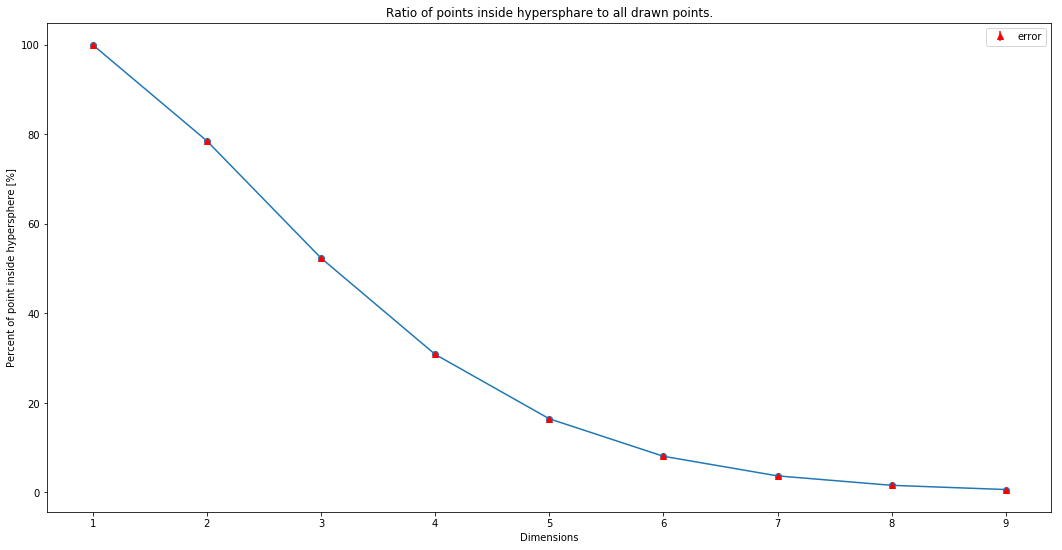

In [295]:
x = np.arange(1,10)


plt.figure(figsize=(18,9))
plt.title("Ratio of points inside hypersphare to all drawn points.")
plt.xlabel("Dimensions")
plt.ylabel("Percent of point inside hypersphere [%]")
plot = plt.plot(x,y_in, 'o-')
plt.errorbar(x, y_in,  std, linestyle='None', fmt='^', color='red', label='error')
plt.legend()

plt.show()

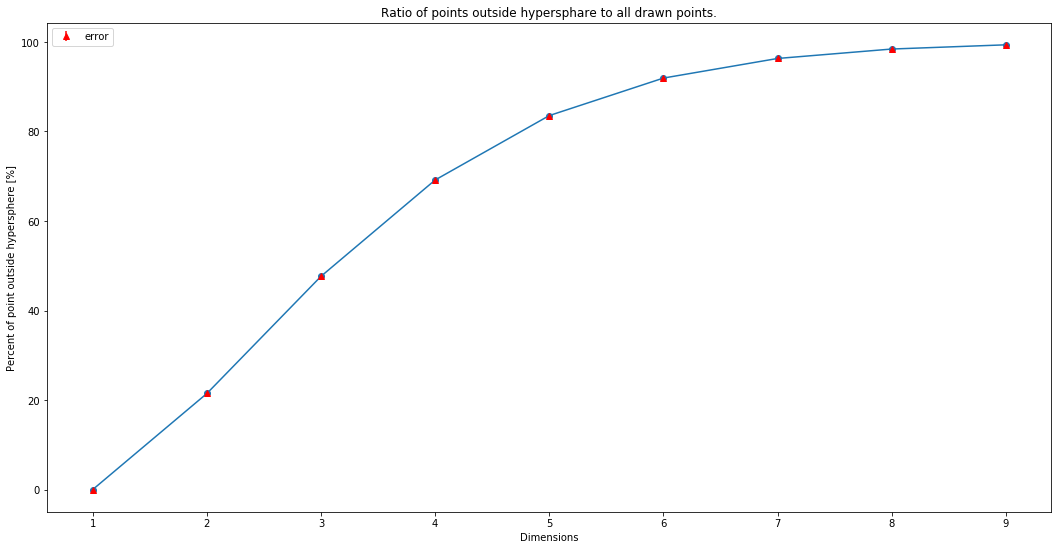

In [294]:
plt.figure(figsize=(18,9))
plt.title("Ratio of points outside hypersphare to all drawn points.")
plt.xlabel("Dimensions")
plt.ylabel("Percent of point outside hypersphere [%]")
plt.plot(x,y_out, 'o-')
plt.errorbar(x, y_out,  std, linestyle='None', fmt='^', color='red', label='error')
plt.legend()

plt.show()

#### Zadanie b

In [158]:
n = 10000

def points_distance(points: np.ndarray):
    avg_dist = np.triu(distance.cdist(points, points, 'euclidean')) #avg distance
    avg_dist_flat = np.asarray(avg_dist).ravel() # flatten matrix, reshaping to vector
    return avg_dist_flat[np.nonzero(avg_dist_flat)] #remove zeroes

def standard_devation_disctance(points: np.ndarray):
    return np.std(points_distance(points))

def avg_distance(points: np.ndarray):
    return np.mean(points_distance(points))

def std_dev_to_avg_distance(points_amount: int, dimension: int):
    assert dimension > 1
    
    random_points = np.random.rand(dimension, points_amount)
    
    std_dist = standard_devation_disctance(random_points)
    avg_dist = avg_distance(random_points)
    
    return std_dist / avg_dist
    
    

In [159]:
result = []
for _ in range(0, 10):
    dim_arr = []
    for dim in range(1, 10):
        dim_arr.append(std_dev_to_avg_distance(dim, n))
    result.append(dim_arr)

0.37685109836692904


In [ ]:
y = []
std = []
for i in range (0, 9):
    result_list = [x[i] for x in result]
    vector = np.asarray(result_list)
    y.append(np.mean(vector))
    std.append(np.std(vector))

In [ ]:
x = np.arange(1,10)


plt.figure(num=None, figsize=(18,9))
plt.title("Ratio of std of distance between points to mean distance between those points")
plt.xlabel("Dimensions")
plt.ylabel("Ratio [std/mean]")
plt.plot(x,y, '-')
plt.errorbar(x, y,  std, linestyle='None', fmt='^', color='red', label='error')
plt.legend()

plt.show()

#### Zadanie c

In [262]:
def get_random_points(dimension: int, point_number: int):
    return np.random.rand(dimension, point_number)

def get_vectors(hypercube: np.ndarray, dimension: int):
    idx = np.random.choice(range(0, hypercube.shape[1]), 4, replace=False)
    
    a_1 = hypercube[:, idx[0]]
    a_2 = hypercube[:, idx[1]]
    b_1 = hypercube[:, idx[2]]
    b_2 = hypercube[:, idx[3]]

    vector1 = a_1 - b_1
    vector2 = a_2 - b_2
    
    return vector1, vector2
def unit_vector(vector: np.array):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1: np.array, v2: np.array):
    """ Returns the angle in radians between vectors 'v1' and 'v2'"""
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return (np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))) * 180 / np.pi



In [263]:
def dim_angles(dim: int, amount: int):
    result = []
    hypercube = get_random_points(dim, amount * 2)
    for i in range(amount):
        a1, a2 = get_vectors(hypercube, amount)
        result.append(angle_between(a1, a2))
    return result

In [271]:
dim3 = dim_angles(3, 200)
dim50 = dim_angles(50, 200)
dim100 = dim_angles(100, 200)
dim250 = dim_angles(250, 200)

In [266]:
import seaborn as sns

C:\Users\Matthew\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'distribution of angles'),
 Text(0.5,0,'angles [degree]'),
 Text(0.5,1,'Distibution of angles, 3 dimension, 200 drawns')]

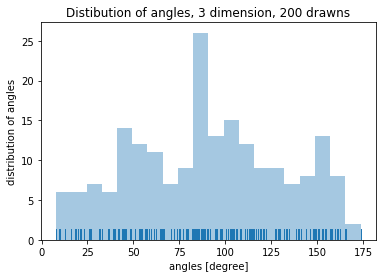

In [282]:
plot = sns.distplot(dim3, bins=20, kde=False, rug=True)
plot.set(xlabel='angles [degree]', ylabel='distribution of angles', title="Distibution of angles, 3 dimension, 200 drawns")

C:\Users\Matthew\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'distribution of angles'),
 Text(0.5,0,'angles [degree]'),
 Text(0.5,1,'Distibution of angles, 50 dimension, 200 drawns')]

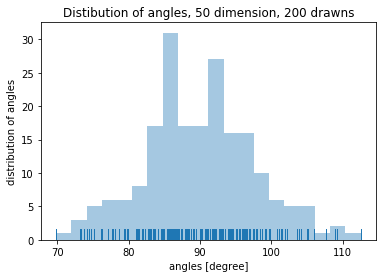

In [283]:
plot = sns.distplot(dim50, bins=20, kde=False, rug=True)
plot.set(xlabel='angles [degree]', ylabel='distribution of angles', title="Distibution of angles, 50 dimension, 200 drawns")

C:\Users\Matthew\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'distribution of angles'),
 Text(0.5,0,'angles [degree]'),
 Text(0.5,1,'Distibution of angles, 100 dimension, 200 drawns')]

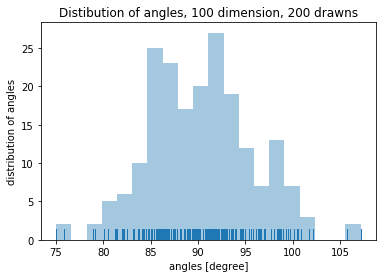

In [284]:
plot = sns.distplot(dim100, bins=20, kde=False, rug=True)
plot.set(xlabel='angles [degree]', ylabel='distribution of angles', title="Distibution of angles, 100 dimension, 200 drawns")

C:\Users\Matthew\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'distribution of angles'),
 Text(0.5,0,'angles [degree]'),
 Text(0.5,1,'Distibution of angles, 250 dimension, 200 drawns')]

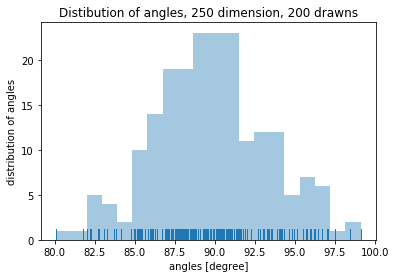

In [285]:
plot = sns.distplot(dim250, bins=20, kde=False, rug=True)
plot.set(xlabel='angles [degree]', ylabel='distribution of angles', title="Distibution of angles, 250 dimension, 200 drawns")